**Logistic Regression with a Neural Network **
Welcome to your first (required) programming assignment! You will build a logistic regression classifier to recognize cats. This assignment will step you through how to do this with a Neural Network mindset, and so will also hone your intuitions about deep learning.


**Instructions:**

    -Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.

**You will learn to:**

    -Build the general architecture of a learning algorithm, including:
    -Initializing parameters
    -Calculating the cost function and its gradient
    -Using an optimization algorithm (gradient descent)
    -Gather all three functions above into a main model function, in the right order.



# Making neural network with Zeros hidden layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage


%matplotlib inline

In [3]:
x= h5py.File('train_catvnoncat.h5','r')
x.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [4]:
y = h5py.File('test_catvnoncat.h5','r')
y.keys()

<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>

In [8]:
x.keys() # here we could see the columns in the data set
X_train = np.array(x['train_set_x'])
y_train = np.array(x['train_set_y']).reshape((1,x['train_set_y'].shape[0]))
X_test = np.array(y['test_set_x'])
y_test = np.array(y['test_set_y']).reshape((1,y['test_set_y'].shape[0]))
print(X_train[0].shape)
class_train = x['list_classes']

(64, 64, 3)


the above image is a b'cat' picture according to the training set


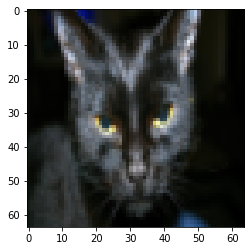

In [6]:

plt.imshow(X_train[25])# showing the the image
print('the above image is a {} picture according to the training set'.format(class_train[1]))


In [7]:
# unrolling the intances from 64x63x3 to 12888,1 array and will be using that as a features.So we have 12288 features on neural network layer 0

In [96]:
X_train_flatten = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]*X_train.shape[3])).T
X_train_flatten.shape

(12288, 209)

In [97]:
X_test_flatten = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]*X_test.shape[3])).T
X_test_flatten.shape

(12288, 50)

In [98]:
print('X_train_flatten.shape  {}\nX_test_flatten.shape  {}'.format(X_train_flatten.shape,X_test_flatten.shape))

X_train_flatten.shape  (12288, 209)
X_test_flatten.shape  (12288, 50)


In [99]:
# now we are standardizing the values which ranges between 0-255 by dividing it by 255
X_train_flatten.dtype

dtype('uint8')

In [100]:
X_train_flatten =  X_train_flatten/255
X_test_flatten  =  X_test_flatten/255

In [101]:
X_test_flatten

array([[0.61960784, 0.45098039, 1.        , ..., 0.16078431, 0.07058824,
        0.52156863],
       [0.40784314, 0.43137255, 0.99215686, ..., 0.18431373, 0.07058824,
        0.63921569],
       [0.3254902 , 0.43529412, 0.99607843, ..., 0.32941176, 0.0627451 ,
        0.29411765],
       ...,
       [0.67843137, 0.67058824, 0.52156863, ..., 0.71764706, 0.56470588,
        0.01960784],
       [0.50196078, 0.69019608, 0.39607843, ..., 0.55294118, 0.5372549 ,
        0.08627451],
       [0.43137255, 0.72941176, 0.4745098 , ..., 0.45490196, 0.42352941,
        0.01960784]])

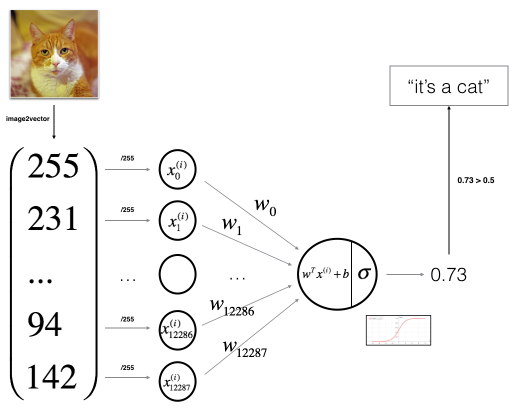

In [102]:
# we will be building a one layer neural network with output node return either one or zero

In [103]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [104]:
def param(X_input):
    np.random.seed(0)
    weight =2*np.random.random((X_input.shape[0],1))-1 # weight.shape = (1,12288)

    b = 0
    return weight,b
param(X_train_flatten)

(array([[ 0.09762701],
        [ 0.43037873],
        [ 0.20552675],
        ...,
        [-0.42574603],
        [ 0.20800562],
        [ 0.54418121]]), 0)

In [108]:
class logistic_regression:
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
##################################################################################################
    def param(X_input):
        np.random.seed(0)
        weight =2*np.random.random((X_input.shape[0],1))-1 # weight.shape = (1,12288)

        b = 0
        return weight,b

####################################################################################################  
    def fit(self,X_input,y_out,learning_rate,num_iterations):
    
        weight,b = param(X_input)# weight and bias section
    
    
        costs = []
        m = X_input.shape[1]

        for i in range(num_iterations):
         # forward propagation
            Z = np.dot(weight.T,X_input)+b # weight.T.shape(1,12288) and X.shape(12288,209)

            a= sigmoid(Z) # shape(1,m)


            cost = (- 1 / m) * np.sum(y_out* np.log(a) + (1 - y_out) * (np.log(1 - a))) 

            # back propagation

            dz = a-y_out
            #print(dz.shape)

            dw = (1/m)*(np.dot(X_input,dz.T))# X.T.shape(12288,209) and dz.shape (1,209)
            #print('dw.shape',dw.shape)
            db = (1/m)*np.sum(dz)


            #print('weight.shape',weight.shape)
            #print('Z.shape',Z.shape)
            #print('a.shape',a.shape)
            #print('y.shape',y.shape)
            #print('dz.shape',dz.shape)
            #print('dw.shape',dw.shape)
            #print('y.shape',y.shape) 

            weight = weight-learning_rate*dw
            b = b-learning_rate*db

            if i%100==0:
                 costs.append(cost)
            if i%100==0:
                print('cost value {} after {} iterrations'.format(cost,i))
        global params,grads
        params = {'w':weight,'b':b}# final parameters 
        grads  = {'dw':dw,'db':db}# final hyperparameters

        # changing the decimal values of to o or 1 depending upon the number
        for i in range(X_input.shape[1]):
            if a[0,i] >.5 or a[0,i]==.5:
                a[0,i] = 1
            if a[0,i]<.5:
                a[0,i]=0
        count = 0

        for i in range(X_input.shape[1]):
            if a[0,i] == y_train[0,i]:
                count =count+1
            else:
                None
        #print('count',count)
        accuracy = count*100/X_input.shape[1]

        result = {'parameters':params,'gradients':grads,'accuracy':accuracy,'cost_function':costs}
        return result

    #######################################################
    
    def single_predict(self,w,b,X_test):
        w = params['w']
        b = params['b']
        z = np.dot(w.T,X_test)+b
        a=sigmoid(z)
        
        for i in range(X_test.shape[1]):
            if a[0,i] >.5 or a[0,i]==.5:
                a[0,i] = 1
            if a[0,i]<.5:
                a[0,i]=0
        
        count = 0

        for i in range(X_test.shape[1]):
            if a[0,i] == y_test[0,i]:
                count =count+1
            else:
                None
        #print('count',count)
        accuracy = count*100/X_test.shape[1]
        
       
        return a,accuracy

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 79)

In [88]:
lr = lr = logistic_regression()
lr.fit(X_train_flatten,y_train,0.05,2000)
lr.single_predict(w,b,X_test_flatten)

# the model gives 68 percent of accuracy . not bad at 1 st try

cost value 14.778640589622725 after 0 iterrations


C:\Users\Ankush Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
C:\Users\Ankush Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply


cost value 1.8392010072062779 after 100 iterrations
cost value 4.43308827162396 after 200 iterrations
cost value 9.384000691416869 after 300 iterrations
cost value 2.3816301652509395 after 400 iterrations
cost value 3.013014551512763 after 500 iterrations
cost value 3.522541148944309 after 600 iterrations
cost value 0.21848311335095444 after 700 iterrations
cost value 0.06902332370253993 after 800 iterrations
cost value 0.030374086939372318 after 900 iterrations
cost value 0.022017894052641204 after 1000 iterrations
cost value 0.017093406376959344 after 1100 iterrations
cost value 0.013985209787645895 after 1200 iterrations
cost value 0.011894095022237223 after 1300 iterrations
cost value 0.010402424747391423 after 1400 iterrations
cost value 0.009285182561646411 after 1500 iterrations
cost value 0.008415024775254373 after 1600 iterrations
cost value 0.007715958274468087 after 1700 iterrations
cost value 0.007140305076540315 after 1800 iterrations
cost value 0.006656771685916149 after 

(array([[1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
         0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
         0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
         1., 0.]]), 68.0)

cost value 14.778640589622725 after 0 iterrations
cost value 5.122451007024276 after 100 iterrations
cost value 4.690911640749095 after 200 iterrations
cost value 4.352276201988016 after 300 iterrations
cost value 4.091297064868258 after 400 iterrations
cost value 3.878500369745473 after 500 iterrations
cost value 3.7039645537064736 after 600 iterrations
cost value 3.5616894769858143 after 700 iterrations
cost value 3.4388955842937126 after 800 iterrations
cost value 3.3285836566477105 after 900 iterrations
cost value 3.227260553716106 after 1000 iterrations
cost value 3.132721902961273 after 1100 iterrations
cost value 3.0436359455708835 after 1200 iterrations
cost value 2.9592810782734325 after 1300 iterrations
cost value 2.879221531931117 after 1400 iterrations
cost value 2.803044647970361 after 1500 iterrations
cost value 2.7302918400691425 after 1600 iterrations
cost value 2.6605299018226853 after 1700 iterrations
cost value 2.593422229417294 after 1800 iterrations
cost value 2.52

cost value 0.07852839143965508 after 1700 iterrations
cost value 0.07024652119436395 after 1800 iterrations
cost value 0.06361283718010705 after 1900 iterrations
cost value 14.778640589622725 after 0 iterrations
cost value 2.650481224183607 after 100 iterrations
cost value 2.0107192117587998 after 200 iterrations
cost value 1.5651365361117358 after 300 iterrations
cost value 1.243422100930918 after 400 iterrations
cost value 0.9680671778952848 after 500 iterrations
cost value 0.7515109132728552 after 600 iterrations
cost value 0.5811601004751553 after 700 iterrations
cost value 0.46382597044216106 after 800 iterrations
cost value 0.3619750369449095 after 900 iterrations
cost value 0.26266107468202965 after 1000 iterrations
cost value 0.1866678314789456 after 1100 iterrations
cost value 0.13692579800399568 after 1200 iterrations
cost value 0.10664162897400013 after 1300 iterrations
cost value 0.08966179658300676 after 1400 iterrations
cost value 0.07723400727857957 after 1500 iterration

cost value 0.0366199886969746 after 1200 iterrations
cost value 0.03091404787856444 after 1300 iterrations
cost value 0.026861435593069957 after 1400 iterrations
cost value 0.02381627781534628 after 1500 iterrations
cost value 0.021437287320918163 after 1600 iterrations
cost value 0.01952400382847877 after 1700 iterrations
cost value 0.017950042584329428 after 1800 iterrations
cost value 0.01663142732732127 after 1900 iterrations
cost value 14.778640589622725 after 0 iterrations
cost value 3.151048978666933 after 100 iterrations
cost value 2.2506852245182865 after 200 iterrations
cost value 1.8565274654736261 after 300 iterrations
cost value 1.4688789996609528 after 400 iterrations
cost value 1.1568165057819328 after 500 iterrations
cost value 0.6448238756644705 after 600 iterrations
cost value 1.0791949912697154 after 700 iterrations
cost value 0.31183412490283136 after 800 iterrations
cost value 0.8835265055919596 after 900 iterrations
cost value 0.05636221210880858 after 1000 iterra

C:\Users\Ankush Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
C:\Users\Ankush Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply


cost value 1.3162820037057605 after 300 iterrations
cost value 1.4634638476963775 after 400 iterrations
cost value 1.1865018278998718 after 500 iterrations
cost value 1.211357909116861 after 600 iterrations
cost value 0.33699432140414676 after 700 iterrations
cost value 0.14239870491483286 after 800 iterrations
cost value 0.08359904235300794 after 900 iterrations
cost value 0.04648224783651636 after 1000 iterrations
cost value 0.03512485745456574 after 1100 iterrations
cost value 0.028527992405096216 after 1200 iterrations
cost value 0.024125823552333562 after 1300 iterrations
cost value 0.02097660903132248 after 1400 iterrations
cost value 0.01861410101649414 after 1500 iterrations
cost value 0.016774932941973505 after 1600 iterrations
cost value 0.015300016402308122 after 1700 iterrations
cost value 0.014088626598692115 after 1800 iterrations
cost value 0.01307427805856606 after 1900 iterrations
cost value 14.778640589622725 after 0 iterrations
cost value 4.242798725067897 after 100 

cost value 4.6270320807953915 after 100 iterrations
cost value 1.7541145650759762 after 200 iterrations
cost value 0.8601196277143476 after 300 iterrations
cost value 7.633667659809692 after 400 iterrations
cost value 4.537139887984518 after 500 iterrations
cost value 0.33755991405748387 after 600 iterrations
cost value 0.19513582826044318 after 700 iterrations
cost value 0.06731677555995355 after 800 iterrations
cost value 0.030321332899178165 after 900 iterrations
cost value 0.021585036912361272 after 1000 iterrations
cost value 0.016450096097544373 after 1100 iterrations
cost value 0.013276083263886566 after 1200 iterrations
cost value 0.011185367622445022 after 1300 iterrations
cost value 0.009717892825716152 after 1400 iterrations
cost value 0.008632309948579095 after 1500 iterrations
cost value 0.007795239669223491 after 1600 iterrations
cost value 0.0071283194479579304 after 1700 iterrations
cost value 0.006582904246128819 after 1800 iterrations
cost value 0.006127346713117404 a

cost value nan after 900 iterrations
cost value nan after 1000 iterrations
cost value nan after 1100 iterrations
cost value nan after 1200 iterrations
cost value nan after 1300 iterrations
cost value nan after 1400 iterrations
cost value nan after 1500 iterrations
cost value nan after 1600 iterrations
cost value nan after 1700 iterrations
cost value nan after 1800 iterrations
cost value nan after 1900 iterrations
cost value 14.778640589622725 after 0 iterrations
cost value nan after 100 iterrations
cost value 16.774824941114993 after 200 iterrations
cost value 14.656046546036357 after 300 iterrations
cost value nan after 400 iterrations
cost value nan after 500 iterrations
cost value nan after 600 iterrations
cost value nan after 700 iterrations
cost value nan after 800 iterrations
cost value nan after 900 iterrations
cost value nan after 1000 iterrations
cost value nan after 1100 iterrations
cost value nan after 1200 iterrations
cost value nan after 1300 iterrations
cost value nan aft

cost value nan after 1500 iterrations
cost value nan after 1600 iterrations
cost value nan after 1700 iterrations
cost value nan after 1800 iterrations
cost value nan after 1900 iterrations
cost value 14.778640589622725 after 0 iterrations
cost value 2.458512512221704 after 100 iterrations
cost value 15.80664308687811 after 200 iterrations
cost value nan after 300 iterrations
cost value 15.300978581694721 after 400 iterrations
cost value nan after 500 iterrations
cost value nan after 600 iterrations
cost value nan after 700 iterrations
cost value nan after 800 iterrations
cost value nan after 900 iterrations
cost value nan after 1000 iterrations
cost value nan after 1100 iterrations
cost value nan after 1200 iterrations
cost value nan after 1300 iterrations
cost value nan after 1400 iterrations
cost value nan after 1500 iterrations
cost value nan after 1600 iterrations
cost value nan after 1700 iterrations
cost value nan after 1800 iterrations
cost value nan after 1900 iterrations
cost

ValueError: setting an array element with a sequence.

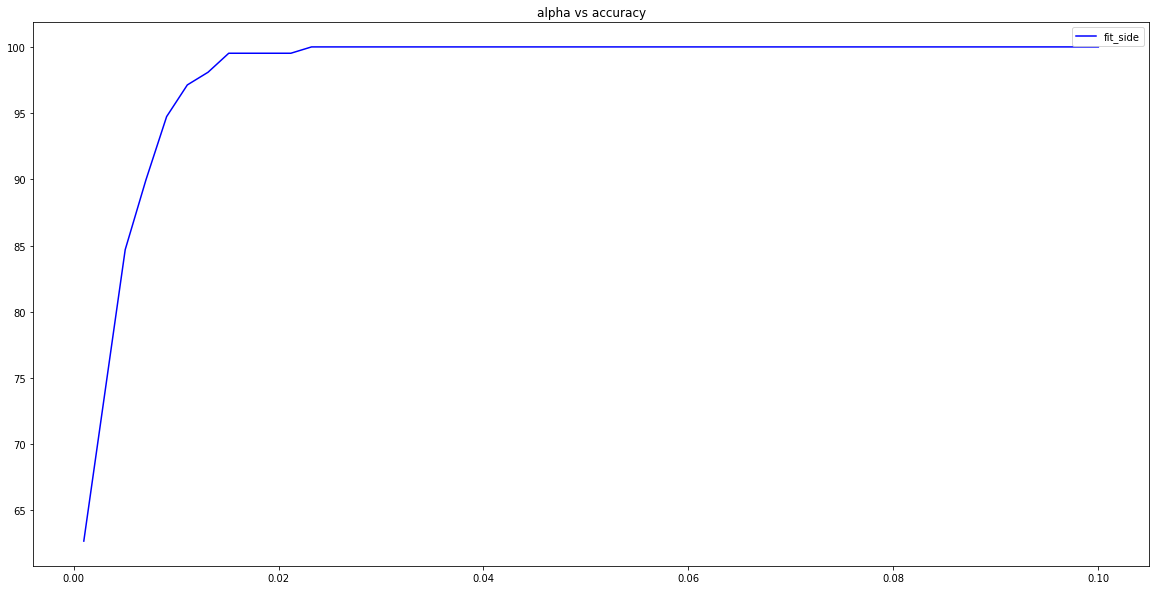

In [89]:
p =np.linspace(0.001,.1)

lr = logistic_regression()
fit_response = []
for i in p:
    result = lr.fit(X_train_flatten,y_train,i,2000)
    accu =result['accuracy']
    fit_response.append([i,accu]) 

response =[]
for i in p:
    accuracy = lr.single_predict(w,b,X_test_flatten)
    response.append([i,accuracy])
# visualizing the the effect of hyperparamters learning rate.

y_predict = [response[i][1] for i in range(50) ]
y_in = [fit_response[i][1] for i in range(50)]

plt.figure(figsize=(20,10))
plt.title('alpha vs accuracy')
plt.plot(p,y_in,color='b',label = 'fit_side')
plt.legend()
plt.plot(p,y_predict,color='r',label='predict_side')
plt.legend()
plt.show()

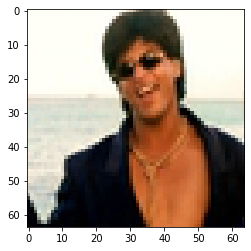

In [35]:
# checking with an image ## excuses for the image 
img = Image.open('shah.jpg')
plt.imshow(img)# lets predict this is a cat or not

In [36]:

img_arr = np.asarray(img)
img_arr.shape

(64, 64, 3)

In [37]:
# lets reshape this in ofrm (12288,1)
img_arr = img_arr.reshape((img_arr.shape[0]*img_arr.shape[1]*img_arr.shape[2],1))

In [38]:
img_arr = img_arr/255
img_arr

array([[1.        ],
       [1.        ],
       [0.96862745],
       ...,
       [0.01568627],
       [0.02352941],
       [0.11372549]])

In [39]:
def convert_arr(image):
    img_arr = np.asarray(image)
    img_arr = img_arr.reshape((img_arr.shape[0]*img_arr.shape[1]*img_arr.shape[2],1))
    img_arr = img_arr/255
    return img_arr

In [75]:
img_arr.shape
lr = logistic_regression()
result = lr.fit(X_train_flatten,y_train,0.04,2000)
w = result['parameters']['w']
b = result['parameters']['b']
lr.single_predict(w,b,img_arr)

cost value 14.778640589622725 after 0 iterrations
cost value 4.34354394126839 after 100 iterrations


C:\Users\Ankush Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
C:\Users\Ankush Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply


cost value 2.2622358335576083 after 200 iterrations
cost value 1.0541190318053733 after 300 iterrations
cost value nan after 400 iterrations
cost value nan after 500 iterrations
cost value 0.298570900871453 after 600 iterrations
cost value 0.18783476681982866 after 700 iterrations
cost value 0.10827407436957355 after 800 iterrations
cost value 0.06149291654388123 after 900 iterrations
cost value 0.03531216623069261 after 1000 iterrations
cost value 0.027176295180174594 after 1100 iterrations
cost value 0.022108939805360307 after 1200 iterrations
cost value 0.018687574281302806 after 1300 iterrations
cost value 0.016251831641453912 after 1400 iterrations
cost value 0.014439232988892006 after 1500 iterrations
cost value 0.013037933505981298 after 1600 iterrations
cost value 0.011919488415767652 after 1700 iterrations
cost value 0.011003251101983566 after 1800 iterrations
cost value 0.010236694281739298 after 1900 iterrations
----------------------------------------
----------------------

array([[5.11301569e-07]])

AxesImage(54,36;334.8x217.44)


(12288, 1)

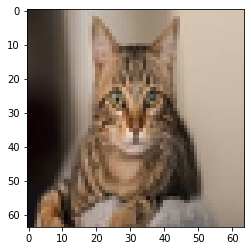

In [73]:
# now lets try with the cat image
img_cat = Image.open('cat.jpg')
print(plt.imshow(img_cat))
img_cat_arr =convert_arr(img_cat)
img_cat_arr.shape

In [76]:
lr.single_predict(w,b,img_cat_arr)
# wrong prediction

----------------------------------------
----------------------------
Non_cat image
value of a = [[0.49358858]]


array([[0.49358858]])

# process to converting multiple images in to array

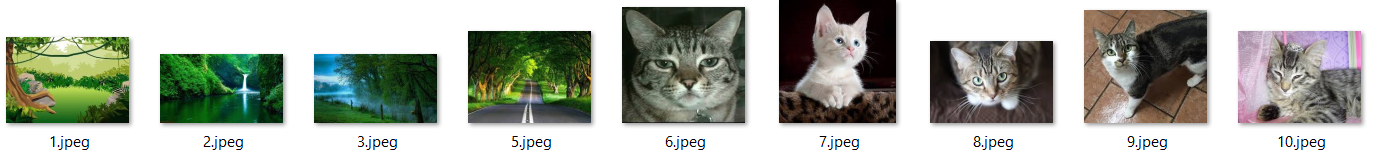


** these are the images ,lets see how out model performs**

In [77]:
collect = []
image = []
for i in range(1,11):
    j = Image.open('{}.jpg'.format(i))
    image.append(j)
    r = np.asarray(j)
    r = r.reshape((r.shape[0]*r.shape[1]*r.shape[2],1))
    collect.append(r)
collect  =np.array(collect)
collect.shape # desirwed shape


(10, 12288, 1)

In [78]:
for i,val in enumerate(collect):
    print(i+1)
    
    lr.single_predict(w,b,val)

1
----------------------------------------
----------------------------
Non_cat image
value of a = [[0.]]
2
----------------------------------------
----------------------------
Non_cat image
value of a = [[0.]]
3
----------------------------------------
----------------------------
Non_cat image
value of a = [[0.]]
4
----------------------------------------
----------------------------
cat it is
value of a = [[1.]]
5
----------------------------------------
----------------------------
Non_cat image
value of a = [[4.46948317e-180]]
6
----------------------------------------
----------------------------
cat it is
value of a = [[1.]]
7
----------------------------------------
----------------------------
cat it is
value of a = [[1.]]
8
----------------------------------------
----------------------------
Non_cat image
value of a = [[0.]]
9
----------------------------------------
----------------------------
cat it is
value of a = [[1.]]
10
----------------------------------------
-----

In [ ]:
# 8.jpg image was not classified as cat but model works better on rest of the images.

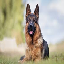

In [83]:
# lets check on gods and see how model works on the same
dog_image = []
collect_dog = []
for i in range(3):
    img= Image.open('{}.jpg'.format(11+i))# loading the pictures
    img = img.resize((64,64)) # forcing the picture to be stored in 64x64 pixels
    dog_image.append(img)
    img_arr = convert_arr(img)
    collect_dog.append(img_arr)
dog_image[2]

AxesImage(54,36;334.8x217.44) (64, 64)


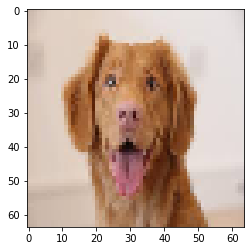

In [80]:
print(plt.imshow(dog_image[0]),dog_image[0].size)# we could see the image has been converted into 64x64 pixels

In [81]:
# now lets see the performace of out model
for i,val in enumerate(collect_dog):
    print(i+1)
    
    lr.single_predict(w,b,val)
# it performs very bad on this animal classification.

1
----------------------------------------
----------------------------
Non_cat image
value of a = [[0.00018036]]
2
----------------------------------------
----------------------------
cat it is
value of a = [[0.99931311]]
3
----------------------------------------
----------------------------
cat it is
value of a = [[0.9924893]]


# learnings

- My first image classification model with the help of neural networks,learning comes from rigorous practice.


- though this seems to a simple model but it took my 3 days to code and successfully run this model.


- with this simple one layer neural network works almost with a accuracy of <b> 70 % </b> on traing set ,though this model was build from scratch so there are plenty of scope for the improvement.



- This is a simple logistic model , imporvement could be seen, if we could change the activation function to <b>relu,tanh,leaky_relu</b> and then evaluate our result.



